Use this notebook to run experiments and plot results easily. You do not need to submit it, but you may use some of the generated plots in your report.

In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

You can use the routine below to plot your results. Be careful to respect the naming conventions of the variables. This means X - training inputs, y - training labels, X_test - test inputs and y_test - predicted labels

In [2]:
data_folder = './data/'

In [3]:
#1- Data loading
training_ds = pd.read_csv(data_folder + 'training.csv', sep=',')
X = training_ds.values

In [4]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

In [27]:
X_test
x_min, x_max

(-3.8493230407294505, 6.043830619153593)

In [8]:
# importing KNN to the mix 
import knn
k = knn.KNN(1)
y = k.minkowski_dist(X_test,1)

ValueError: operands could not be broadcast together with shapes (245520,2) (0,) 

In [6]:
utils.plot_results(xx,yy, X, y, y_test_k3, "k=" + str(k))

NameError: name 'y' is not defined

## Part II – The curse of dimensionality:

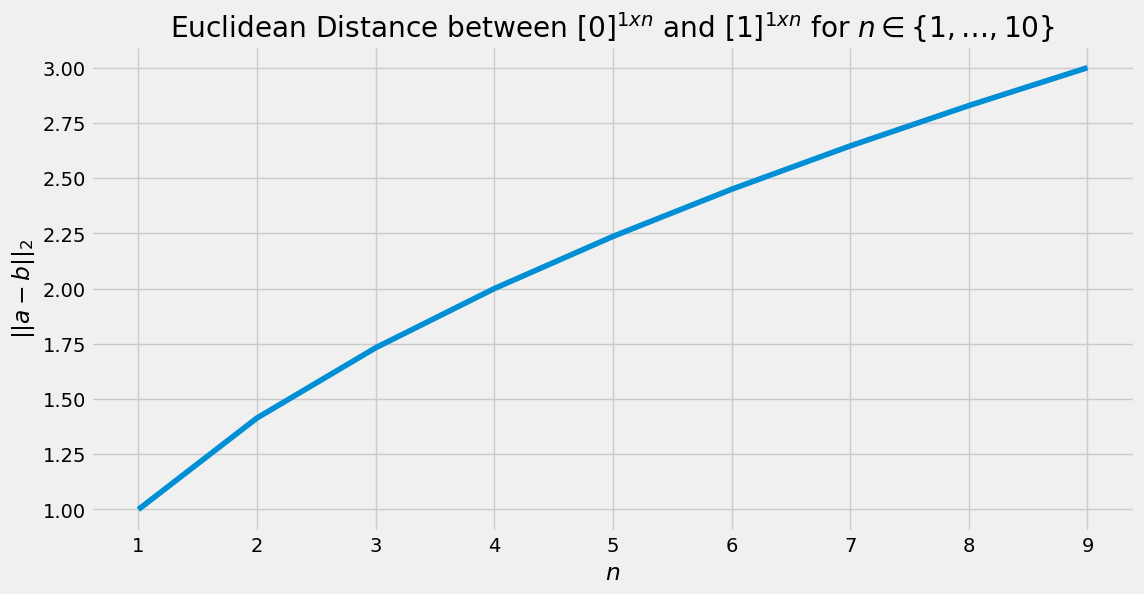

In [28]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
plt.figure(figsize=(12, 6))
plt.title(
    "Euclidean Distance between $[0]^{1 x n}$ and $[1]^{1 x n}$ for $n \in \{1, \ldots, 10\}$"
)
plt.xlabel('$n$')
plt.ylabel('$|| a - b ||_2$')
plt.plot(range(1, 10), np.sqrt(range(1, 10)))

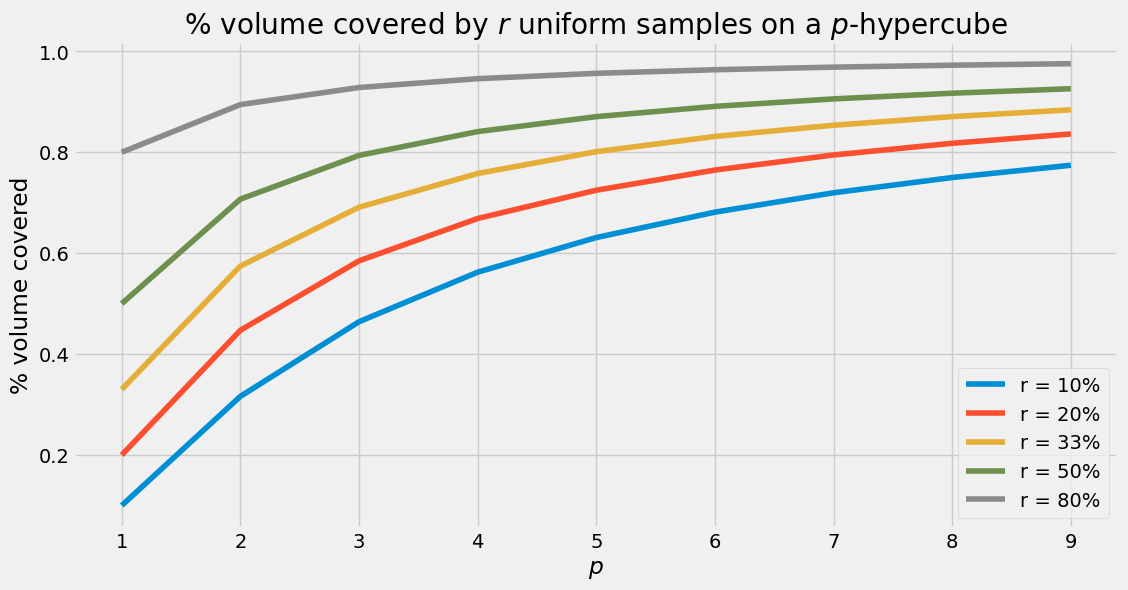

In [29]:
plt.figure(figsize=(12, 6))
plt.title(
    "% volume covered by $r$ uniform samples on a $p$-hypercube"
)
plt.xlabel('$p$')
plt.ylabel('% volume covered')

plt.plot(range(1, 10), [0.1**(1/n)  for n in range(1, 10)], label="p = 10%")
plt.plot(range(1, 10), [0.2**(1/n)  for n in range(1, 10)], label="p = 20%")
plt.plot(range(1, 10), [0.33**(1/n) for n in range(1, 10)], label="p = 33%")
plt.plot(range(1, 10), [0.5**(1/n)  for n in range(1, 10)], label="p = 50%")
plt.plot(range(1, 10), [0.8**(1/n)  for n in range(1, 10)], label="p = 80%")
plt.legend()

# References

- [ ] [k-Nearest Neighbors](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)
- [ ] [Loss Functions in Python - Easy Implementation](https://www.digitalocean.com/community/tutorials/loss-functions-in-python)
- [ ] [Curse of Dimensionality](https://www.kaggle.com/code/residentmario/curse-of-dimensionality/notebook)